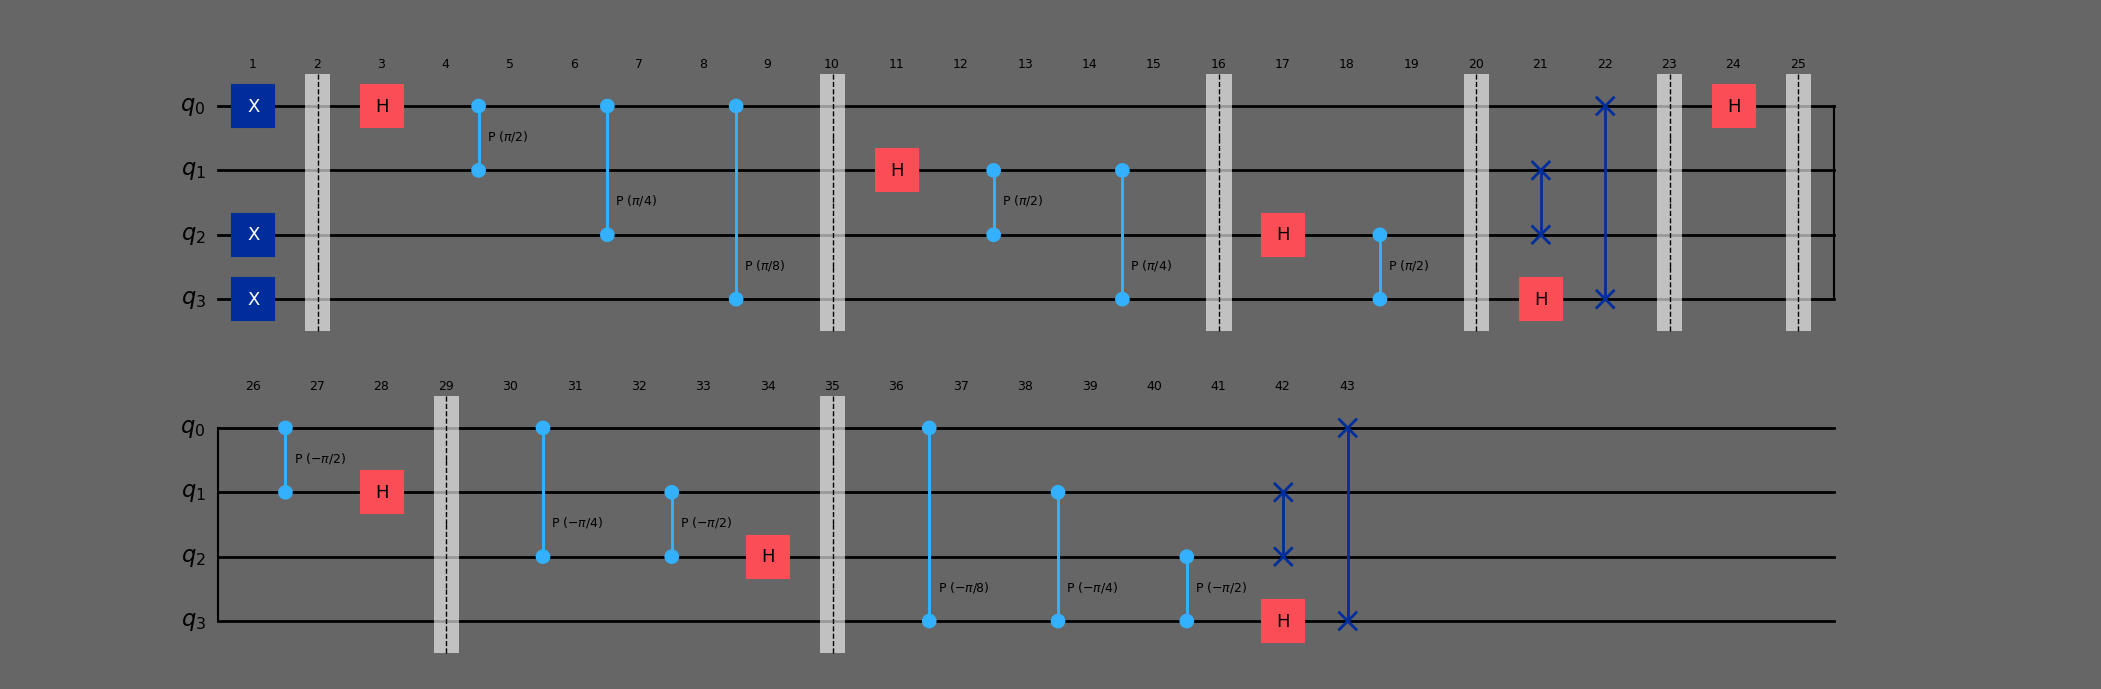

In [3]:
from qiskit import QuantumCircuit
import numpy as np

# importing the style for the circuit from local *.py file.
import sys
sys.path.append('C:/Users/Gustavo_Porcilio/ALGORITHMS/Doc_help')
from circuit_style import style

def qft(circuit, n):
    """Apply the QFT on the first n qubits in the circuit."""
    for j in range(n):
        circuit.barrier()
        circuit.h(j)
        for m in range(j+1, n):
            circuit.cp(np.pi / float(2**(m-j)), j, m)

# Add the inverse QFT
def qft_inverse(circuit, n):
    """Apply the inverse QFT on the first n qubits in the circuit."""
    # Apply SWAP gates
    for qubit in range(n // 2):
        circuit.swap(qubit, n - qubit - 1)
    # Apply controlled phase gates and Hadamard gates
    for j in range(n):
        circuit.barrier()
        for m in range(j):
            circuit.cp(-np.pi / float(2**(j-m)), m, j)
        circuit.h(j)
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)

# Create a quantum circuit with 4 qubits
qc = QuantumCircuit(4)

# initialize the first qubit to |1>
qc.x(0)
qc.x(2)
qc.x(3)

# Apply the QFT
qft(qc, 4)

# Apply the inverse QFT
qft_inverse(qc, 4)


# Draw the circuit
qc.draw(style=style, output="mpl")


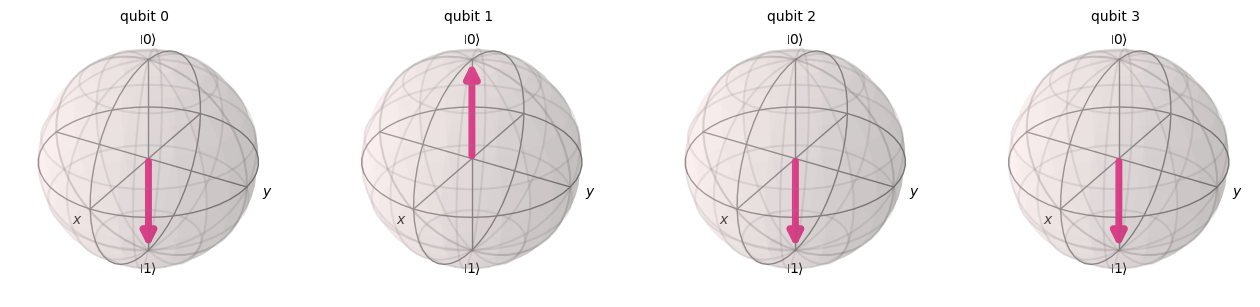

In [4]:
from qiskit.quantum_info import Statevector
state = Statevector(qc)
state.draw('bloch')

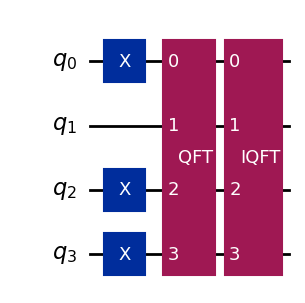

In [6]:
from qiskit.circuit.library import QFT
q_auto = QuantumCircuit(4)
q_auto.x(0)
q_auto.x(2)
q_auto.x(3)
q_auto.append(QFT(4, insert_barriers=True, do_swaps=False), range(4))
q_auto.append(QFT(4, insert_barriers=True, do_swaps=False).inverse(), range(4))

q_auto.draw("mpl")



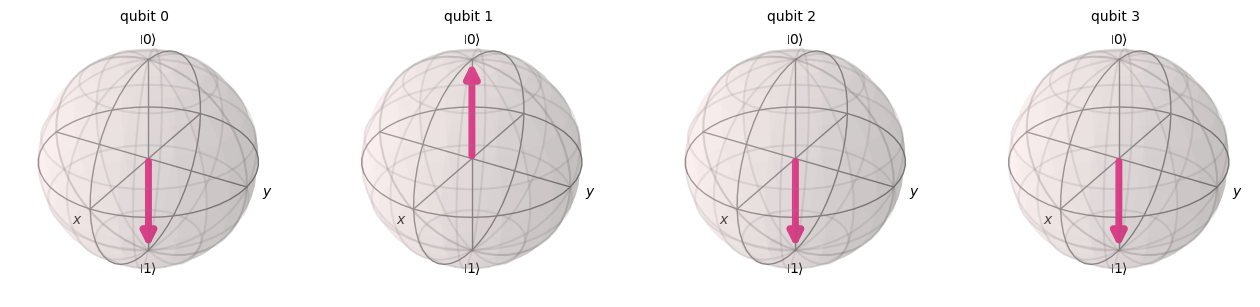

In [7]:
state_auto = Statevector(q_auto)
state_auto.draw('bloch')